In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats



from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder, StandardScaler, PowerTransformer, MinMaxScaler, LabelEncoder, RobustScaler

from sklearn.model_selection import RepeatedStratifiedKFold, KFold, cross_val_predict, train_test_split, GridSearchCV, cross_val_score, cross_validate

from sklearn.linear_model import LinearRegression, Lasso, Ridge,ElasticNet

from sklearn.metrics import plot_confusion_matrix, r2_score, mean_absolute_error, mean_squared_error, classification_report, confusion_matrix, accuracy_score, classification_report

from sklearn.metrics import make_scorer, precision_score, precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score, roc_curve, f1_score, accuracy_score, recall_score

from sklearn.pipeline import make_pipeline

from sklearn.compose import make_column_transformer

from sklearn.neighbors import KNeighborsRegressor

from sklearn.svm import SVR

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostClassifier

from sklearn.feature_selection import SelectKBest, SelectPercentile, f_classif, f_regression, mutual_info_regression

from xgboost import XGBRegressor, XGBClassifier
from xgboost import plot_importance

from sklearn.pipeline import Pipeline

from sklearn.tree import plot_tree

from sklearn.impute import SimpleImputer, KNNImputer

from sklearn.model_selection import StratifiedKFold

from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.naive_bayes import GaussianNB

from sklearn.svm import SVC



#importing plotly and cufflinks in offline mode
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('max_colwidth',200)

# pd.set_option('display.max_rows', 100) # if you wish to see more rows rather than default, just uncomment this line.
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', lambda x: '%.3f' % x)



In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/mhealth/stroke-healthcare.csv") 

In [ ]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
df.shape

(5110, 12)

In [6]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [7]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000,5110.000,5110.000,5110.000,5110.000,4909.000,5110.000
mean,36517.829,43.227,0.097,0.054,106.148,28.893,0.049
std,21161.722,22.613,0.297,0.226,45.284,7.854,0.215
min,67.000,0.080,0.000,0.000,55.120,10.300,0.000
25%,17741.250,25.000,0.000,0.000,77.245,23.500,0.000
50%,36932.000,45.000,0.000,0.000,91.885,28.100,0.000
75%,54682.000,61.000,0.000,0.000,114.090,33.100,0.000
max,72940.000,82.000,1.000,1.000,271.740,97.600,1.000


In [8]:
df.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [9]:
df = df.drop(columns = ['id'])


In [ ]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [10]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [11]:
from sklearn.impute import SimpleImputer
import numpy as np
missing_value_imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
X=df.iloc[:,8].values 
X=X.reshape(-1,1) 
df.iloc[:,8]=missing_value_imputer.fit_transform(X)
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Text(0.5, 1.0, 'Stroke')

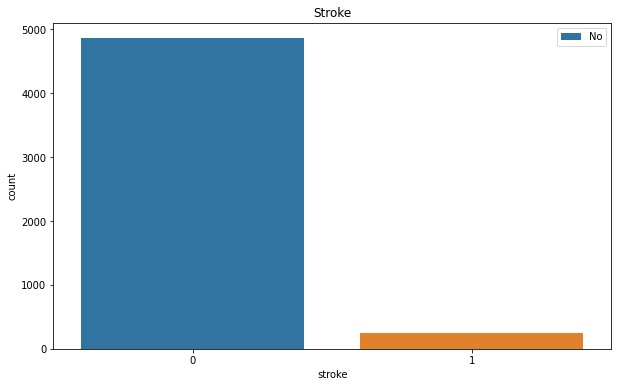

In [12]:
sns.countplot(x="stroke", data=df)
plt.legend(["No","Yes"])
plt.title("Stroke")

In [13]:
y = df['stroke']
print(f'Percentage of stroke: % {round(y.value_counts(normalize=True)[1]*100,2)} --> \
({y.value_counts()[1]} cases for stroke)\nPercentage of NOT stroke: % {round(y.value_counts(normalize=True)[0]*100,2)} --> ({y.value_counts()[0]} cases for NOT stroke)')

Percentage of stroke: % 4.87 --> (249 cases for stroke)
Percentage of NOT stroke: % 95.13 --> (4861 cases for NOT stroke)


In [14]:
numerical= df.drop(['stroke'], axis=1).select_dtypes('number').columns

categorical = df.select_dtypes('object').columns

print(f'Numerical Columns:  {df[numerical].columns}')
print('\n')
print(f'Categorical Columns: {df[categorical].columns}')

Numerical Columns:  Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi'], dtype='object')


Categorical Columns: Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')


In [15]:
for col in numerical:
  print(f"{col} has {df[col].nunique()} unique value")

age has 104 unique value
hypertension has 2 unique value
heart_disease has 2 unique value
avg_glucose_level has 3979 unique value
bmi has 419 unique value


In [16]:
df[numerical].head().T

,0,1,2,3,4
age,67.000,61.000,80.000,49.000,79.000
hypertension,0.000,0.000,0.000,0.000,1.000
heart_disease,1.000,0.000,1.000,0.000,0.000
avg_glucose_level,228.690,202.210,105.920,171.230,174.120
bmi,36.600,28.893,32.500,34.400,24.000


In [17]:
df[numerical].describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdPu')

,count,mean,std,min,25%,50%,75%,max
age,5110.000000,43.226614,22.612647,0.080000,25.000000,45.000000,61.000000,82.000000
hypertension,5110.000000,0.097456,0.296607,0.000000,0.000000,0.000000,0.000000,1.000000
heart_disease,5110.000000,0.054012,0.226063,0.000000,0.000000,0.000000,0.000000,1.000000
avg_glucose_level,5110.000000,106.147677,45.283560,55.120000,77.245000,91.885000,114.090000,271.740000
bmi,5110.000000,28.893237,7.698018,10.300000,23.800000,28.400000,32.800000,97.600000


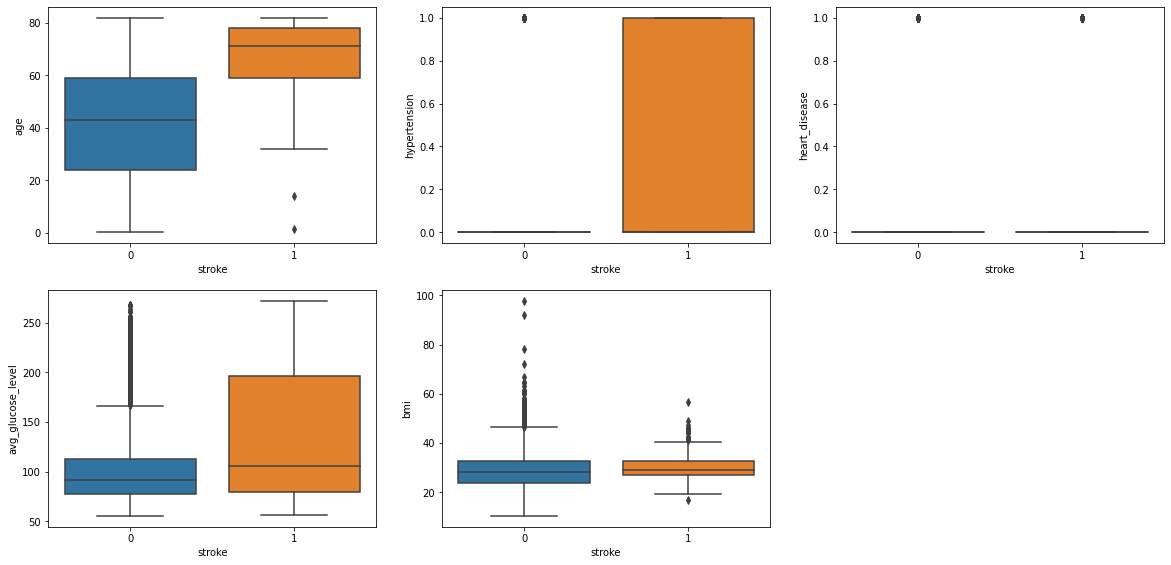

In [18]:
index = 0
plt.figure(figsize=(20,20))
for feature in numerical:
    if feature != "stroke":
        index += 1
        plt.subplot(4, 3, index)
        sns.boxplot(x='stroke', y=feature, data=df)

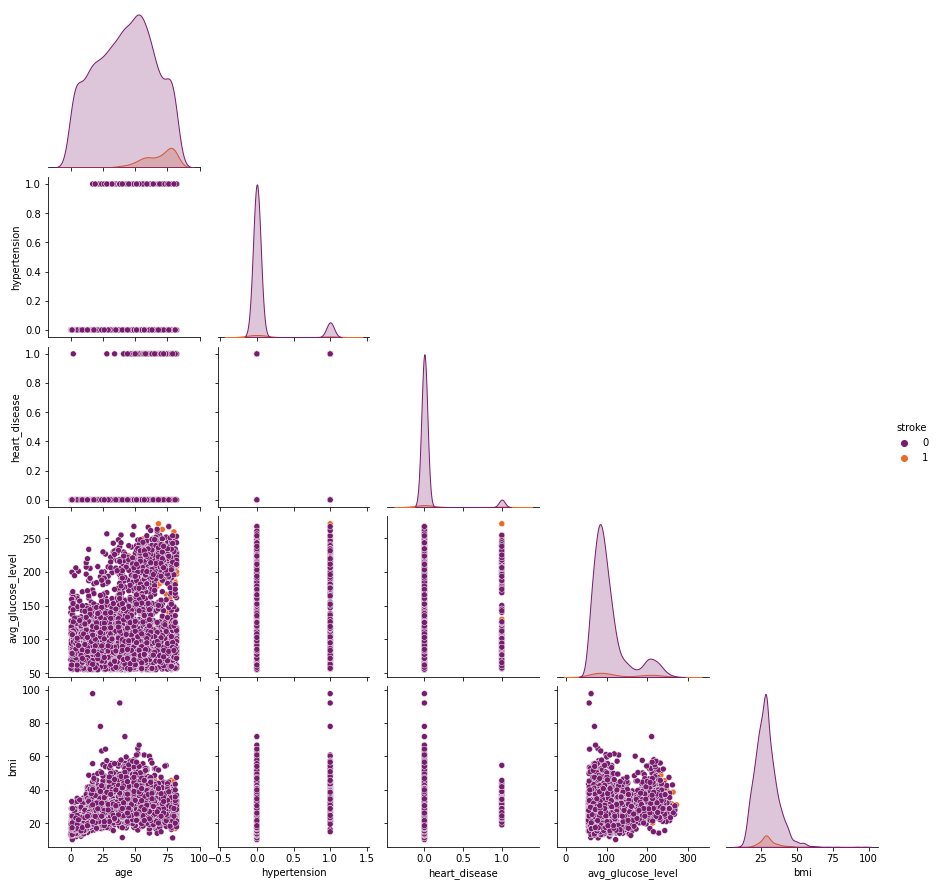

In [19]:
sns.pairplot(df, hue="stroke", palette="inferno", corner=True);

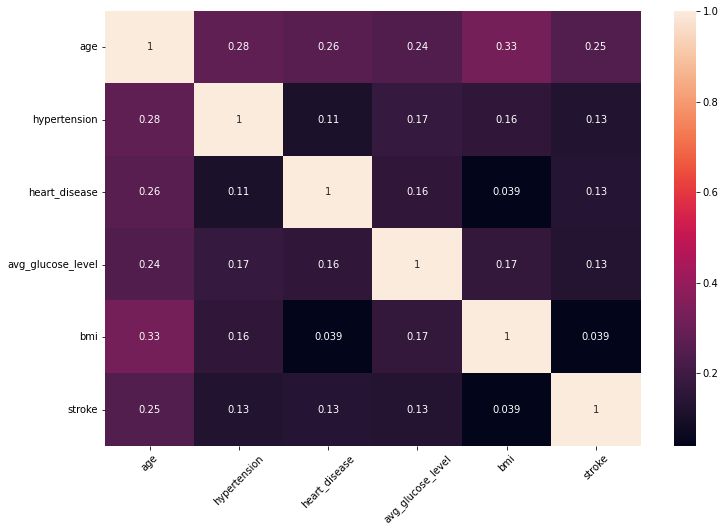

In [20]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True)
plt.xticks(rotation=45);

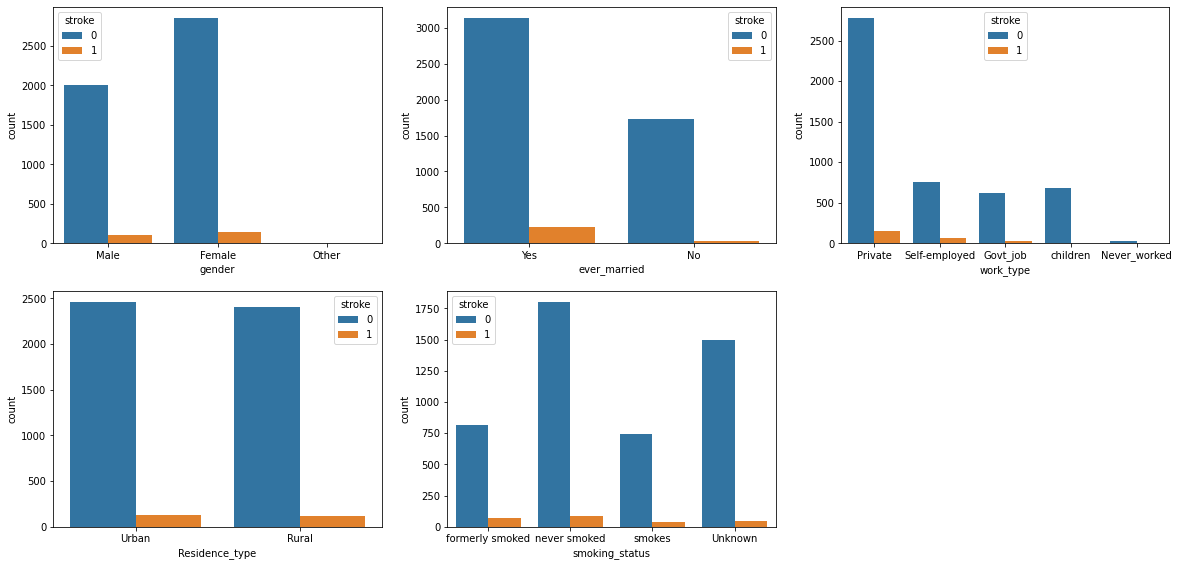

In [21]:
index = 0
plt.figure(figsize=(20,20))
for feature in categorical:
    if feature != "stroke":
        index += 1
        plt.subplot(4, 3, index)
        sns.countplot(data = df, x =feature, hue = "stroke")

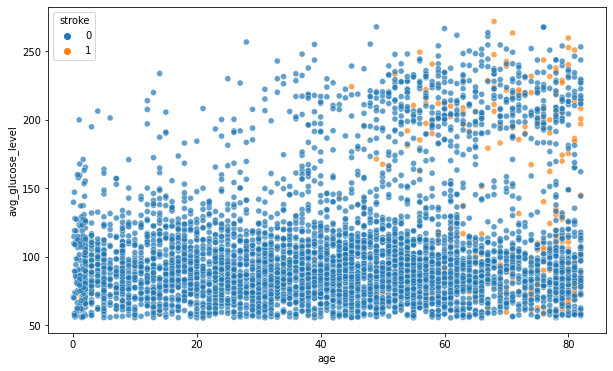

In [22]:
sns.scatterplot(data=df, x='age', y='avg_glucose_level', hue='stroke', alpha=0.7)

In [36]:
from sklearn.preprocessing import LabelEncoder  
labelencoder = LabelEncoder()
X= df['gender'].values
df['gender'] = labelencoder.fit_transform(X)
X = X.reshape(-1,1)


In [35]:
labelencoder = LabelEncoder()
X= df['ever_married'].values
df['ever_married'] = labelencoder.fit_transform(X)
X = X.reshape(-1,1)


In [38]:
labelencodere = LabelEncoder()
X= df['Residence_type'].values
df['Residence_type'] = labelencoder.fit_transform(X)
X = X.reshape(-1,1)


In [39]:
labelencodere = LabelEncoder()
X= df['smoking_status'].values
df['smoking_status'] = labelencoder.fit_transform(X)
X = X.reshape(-1,1)

In [42]:
labelencodere = LabelEncoder()
X= df['work_type'].values
df['work_type'] = labelencoder.fit_transform(X)
X = X.reshape(-1,1)

In [44]:
X = df.drop(["stroke"], axis=1)
y = df["stroke"]

In [45]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='minority')
X_sm, y_sm = sm.fit_resample(X, y)

y_sm.value_counts()

1    4861
0    4861
Name: stroke, dtype: int64

In [46]:
X_train, X_test, y_train, y_test = train_test_split( X_sm,y_sm, test_size=0.2, stratify = y_sm, random_state = 101)

In [47]:
scaler = MinMaxScaler()
scaler
MinMaxScaler()

MinMaxScaler()

In [48]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
def model_first_insight(X_train, y_train, class_weight, solver='liblinear'):
    # Logistic Regression
    log = LogisticRegression(random_state=101, class_weight=class_weight)
    log.fit(X_train, y_train)
    
    # Decision Tree
    decision_tree = DecisionTreeClassifier(criterion = 'entropy', random_state=101, class_weight=class_weight)
    decision_tree.fit(X_train, y_train)
   
    # Random Forest
    random_forest = RandomForestClassifier(n_estimators=10, criterion = 'entropy', random_state=101, class_weight=class_weight)
    random_forest.fit(X_train, y_train)
    
    # KNN
    knn = KNeighborsClassifier(n_neighbors = 3)
    knn.fit(X_train, y_train) 
   
    # SVC
    svc = SVC(random_state=101, class_weight=class_weight)
    svc.fit(X_train, y_train) 
    print(f"\033[1m1) Logistic Regression Training Accuracy:\033[0m {log.score(X_train, y_train)}")
    print(f"\033[1m2) SVC Training Accuracy:\033[0m {svc.score(X_train, y_train)}")    
    print(f"\033[1m3) Decision Tree Training Accuracy:\033[0m {decision_tree.score(X_train, y_train)}")
    print(f"\033[1m4) Random Forest Training Accuracy:\033[0m {random_forest.score(X_train, y_train)}")
    print(f"\033[1m5) KNN Training Accuracy:\033[0m {knn.score(X_train, y_train)}")

    
    return log, svc, decision_tree, random_forest, knn

In [ ]:
def models(X_train, y_train, class_weight):
    
    # Logistic Regression
    log = LogisticRegression(random_state=101, class_weight=class_weight, solver='liblinear')
    log.fit(X_train, y_train)
    
    # Decision Tree
    decision_tree = DecisionTreeClassifier(criterion = 'entropy', random_state=101, class_weight=class_weight)
    decision_tree.fit(X_train, y_train)
    
    # Random Forest
    random_forest = RandomForestClassifier(n_estimators=10, criterion = 'entropy', random_state=101, class_weight=class_weight)
    random_forest.fit(X_train, y_train)
    # KNN
    knn = KNeighborsClassifier(n_neighbors = 3)
    knn.fit(X_train, y_train) 
   
    # SVC
    svc = SVC(random_state=101, class_weight=class_weight)
    svc.fit(X_train, y_train) 
    print(f"\033[1m1) Logistic Regression Training Accuracy:\033[0m {log}")
    print(f"\033[1m2) SVC Training Accuracy:\033[0m {svc}")    
    print(f"\033[1m3) Decision Tree Training Accuracy:\033[0m {decision_tree}")
    print(f"\033[1m4) Random Forest Training Accuracy:\033[0m {random_forest}")
    print(f"\033[1m5) KNN Training Accuracy:\033[0m {knn}")
  
    return log.score(X_train, y_train), svc.score(X_train, y_train),decision_tree.score(X_train, y_train),random_forest.score(X_train, y_train),knn.score(X_train, y_train)

In [ ]:
def models_accuracy(X_Set, y_Set):    
    Scores = pd.DataFrame(columns = ["LR_Acc", "SVC_Acc", "DT_Acc", "RF_Acc", "KNN_Acc"])
    print("\033[1mBASIC ACCURACY\033[0m")
    Basic = [log_acc, svc_acc, decision_tree_acc, random_forest_acc, knn_acc] = models(X_train, y_train, None)
    Scores.loc[0] = Basic

    print("\n\033[1mSCALED ACCURACY WITHOUT BALANCED\033[0m")    
    Scaled = [log_acc, svc_acc, decision_tree_acc, random_forest_acc, knn_acc] = models(X_train_scaled, y_train, None)
    Scores.loc[1] = Scaled

    
    print("\n\033[1mBASIC ACCURACY WITH BALANCED\033[0m")
    Balanced = [log_acc, svc_acc, decision_tree_acc, random_forest_acc, knn_acc] = models(X_train, y_train, "balanced")
    Scores.loc[2] = Balanced

    print("\n\033[1mSCALED ACCURACY WITH BALANCED\033[0m")    
    Scaled_Balanced = [log_acc, svc_acc, decision_tree_acc, random_forest_acc, knn_acc] = models(X_train_scaled, y_train, "balanced")
    Scores.loc[3] = Scaled_Balanced
    Scores.set_axis(['Basic', 'Scaled', 'Balanced', 'Scaled_Balanced'], axis='index', inplace=True)
    #Scores.style.background_gradient(cmap='RdPu')

    return Scores.style.applymap(lambda x: "background-color: pink" if x<0.6 or x == 1 else "background-color: lightgreen")\
                       .applymap(lambda x: 'opacity: 40%;' if (x < 0.8) else None)\
                       .applymap(lambda x: 'color: red' if x == 1 or x <=0.8 else 'color: darkblue')

In [ ]:
models_accuracy(X_train, y_train)

BASIC ACCURACY
1) Logistic Regression Training Accuracy: LogisticRegression(random_state=101, solver='liblinear')
2) SVC Training Accuracy: SVC(random_state=101)
3) Decision Tree Training Accuracy: DecisionTreeClassifier(criterion='entropy', random_state=101)
4) Random Forest Training Accuracy: RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=101)
5) KNN Training Accuracy: KNeighborsClassifier(n_neighbors=3)

SCALED ACCURACY WITHOUT BALANCED
1) Logistic Regression Training Accuracy: LogisticRegression(random_state=101, solver='liblinear')
2) SVC Training Accuracy: SVC(random_state=101)
3) Decision Tree Training Accuracy: DecisionTreeClassifier(criterion='entropy', random_state=101)
4) Random Forest Training Accuracy: RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=101)
5) KNN Training Accuracy: KNeighborsClassifier(n_neighbors=3)

BASIC ACCURACY WITH BALANCED
1) Logistic Regression Training Accuracy: LogisticRegression(class_weight='ba

,LR_Acc,SVC_Acc,DT_Acc,RF_Acc,KNN_Acc
Basic,0.785521,0.777421,1.000000,0.996528,0.940208
Scaled,0.786164,0.808924,1.000000,0.996657,0.937894
Balanced,0.785521,0.777421,1.000000,0.996785,0.940208
Scaled_Balanced,0.786164,0.808924,1.000000,0.997043,0.937894
